In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:/Users/Sinch/OneDrive/Desktop/AISI  HTML/Datasets/Titanic-Dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
# Number of rows and columns
df.shape

(891, 12)

In [4]:
# Checking for null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
# Handle missing values by deleting columns
df.drop(columns=['Cabin'],inplace=True)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


# Data Preprocessing

In [7]:
# To convert the Dtype to int
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Name']=le.fit_transform(df['Name'])
df['Sex']=le.fit_transform(df['Sex'])
df['Age']=le.fit_transform(df['Age'])
df['Ticket']=le.fit_transform(df['Ticket'])
df['Fare']=le.fit_transform(df['Fare'])
df['Embarked']=le.fit_transform(df['Embarked'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  891 non-null    int64
 1   Survived     891 non-null    int64
 2   Pclass       891 non-null    int64
 3   Name         891 non-null    int32
 4   Sex          891 non-null    int32
 5   Age          891 non-null    int64
 6   SibSp        891 non-null    int64
 7   Parch        891 non-null    int64
 8   Ticket       891 non-null    int32
 9   Fare         891 non-null    int64
 10  Embarked     891 non-null    int32
dtypes: int32(4), int64(7)
memory usage: 62.8 KB


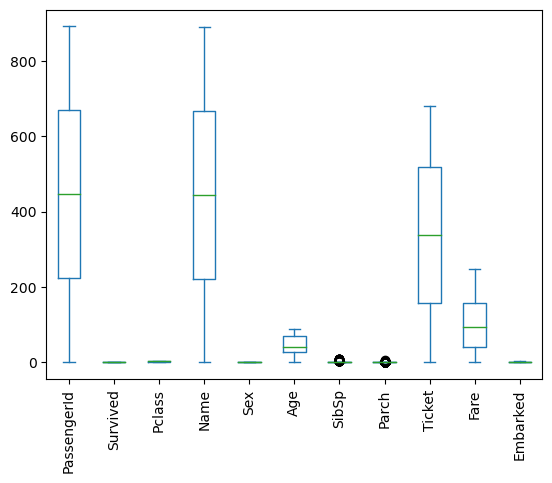

In [8]:
# Checkout for Outliers and Handling them
df.plot(kind='box')
plt.xticks(rotation=90)
plt.show()

In [9]:
#Removing outliers in id column 
#find iqr
q1=df['SibSp'].quantile(0.25)
q3=df['SibSp'].quantile(0.75)
print("Q1=",q1)
print("Q3=",q3)
iqr=q3-q1
print("iqr=",(q3-q1))
# calculate upperlimit and lowerlimit
lower=q1-1.5*iqr
upper=q3+1.5*iqr
print("Lower limits= ",lower)
print("upper limits= ",upper)
df[df['SibSp'] > upper]
df[df['SibSp'] < lower]
df=df[df['SibSp'] < upper]
df['SibSp'].describe()

Q1= 0.0
Q3= 1.0
iqr= 1.0
Lower limits=  -1.5
upper limits=  2.5


count    845.000000
mean       0.313609
std        0.530909
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        2.000000
Name: SibSp, dtype: float64

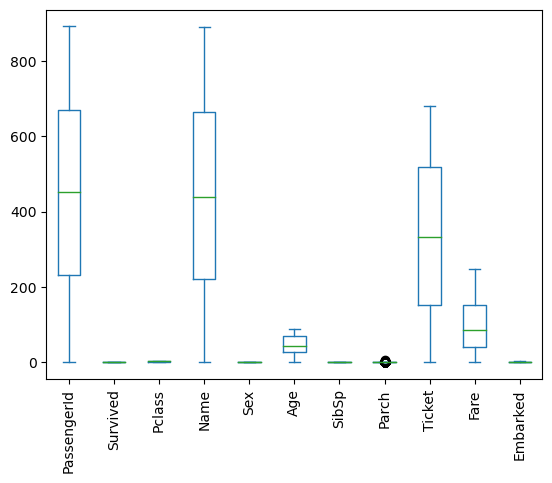

In [10]:
# Checkout for Outliers after Handling them
df.plot(kind='box')
plt.xticks(rotation=90)
plt.show()

In [12]:
# Vertical split
X = df.drop('Survived', axis=1)
y = df['Survived']


In [13]:
# Horizontal split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


In [14]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (676, 10)
X_test shape: (169, 10)
y_train shape: (676,)
y_test shape: (169,)


# Linear Regression

In [16]:
#Linear Regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
#fitting the model
lr.fit(X_train,y_train)
print("Training completed")

Training completed


In [17]:
#Training and Testing score
print("Training score: ",lr.score(X_train,y_train))
print("Testing score: ",lr.score(X_test,y_test))

Training score:  0.40583646957158703
Testing score:  0.36183528120317876


In [18]:
#Accuracy
print("accuracy",lr.score(X,y)*100)

accuracy 39.78488828583543


In [20]:
# Make predictions on the test set
y_pred = lr.predict(X_test)

In [21]:
pred=lr.predict(X_test)
pred

array([ 7.15906176e-01,  1.73499751e-01,  1.01273060e+00,  8.00920095e-01,
        1.16655672e-01,  7.90947782e-01,  9.10972454e-01,  1.02052189e+00,
        1.15711230e-01, -1.62120160e-02,  8.54617268e-02,  8.44654751e-01,
        1.24545688e-01,  6.43620034e-01,  9.29913423e-01,  6.21224385e-01,
        3.26748948e-01,  1.70574833e-01,  6.62992535e-01,  2.20407669e-01,
        1.32141021e-01,  8.25224065e-01,  3.34577235e-02,  1.36512959e-01,
        1.75516382e-01,  6.57326231e-01,  1.82052640e-02,  3.63469634e-01,
        8.62151500e-03,  7.36041918e-01,  4.20969165e-01,  2.75696662e-01,
       -1.07983656e-03,  7.87720194e-01,  9.64125511e-02,  4.20867392e-01,
        9.99923319e-01,  8.98804504e-01,  6.80964890e-01,  5.48945912e-01,
        3.41003194e-01,  3.08732357e-01,  7.33505031e-01,  4.59167468e-01,
        8.73055783e-02,  2.80278308e-01,  6.01687658e-02,  1.06163996e+00,
        8.05871912e-01,  3.45202775e-02,  2.39139894e-01,  7.70738430e-03,
        1.71093678e-02,  

In [22]:
y_test=y_test.ravel()
pred=pred.ravel()
act=pd.DataFrame({'Actual':y_test,'Predicted':pred})
act.head()

,Actual,Predicted
0,1,0.715906
1,0,0.173500
2,1,1.012731
3,1,0.800920
4,0,0.116656


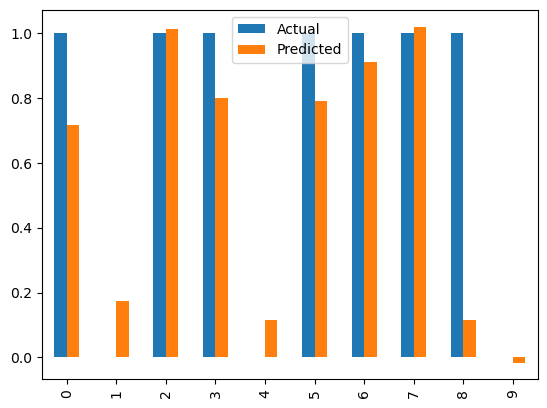

In [23]:
act.head(10).plot(kind='bar')
plt.show()

In [24]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score
#evaluation metrics
mse=mean_squared_error(y_test,pred)
rmse=np.sqrt(y_test,pred)
print("MAE = ",mean_absolute_error(y_test,pred))
print("RMSE = ",rmse)
print("R2_Score = ",r2_score(y_test,pred))

MAE =  0.0
RMSE =  [1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0.
 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1.
 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0.
 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0.
 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.
 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0.
 0.]
R2_Score =  1.0
